## Projeto 2 - FIAD - Data Fusion
- Diogo Fontes 2023187110
- José Silva 2020237724

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = np.loadtxt('Meta2COVID.txt')
df = pd.DataFrame(data, columns=['GD', 'AG', 'MS', 'VA', 'BD', 'HR', 'BP', 'TP', 'Rule'])

df['GUIDELINES'] = 0
df.loc[(df['BD'] >= 2) & (df['TP'] > 37.8),'GUIDELINES'] = 1

a = df[df['Rule'] == 1]
not_a = df[df['Rule'] == 0]

df

,GD,AG,MS,VA,BD,HR,BP,TP,Rule,GUIDELINES
0,0.0,49.148903,1.0,1.0,1.0,83.456271,135.09198,37.503016,0.0,0
1,0.0,84.766807,1.0,0.0,3.0,79.449753,132.81408,36.832310,1.0,0
2,1.0,75.031336,0.0,0.0,3.0,85.470779,137.33184,37.580005,1.0,0
3,1.0,55.087958,0.0,0.0,1.0,51.561135,149.29652,36.959370,0.0,0
4,0.0,62.550938,1.0,0.0,2.0,89.008377,121.42689,37.744883,1.0,0
...,...,...,...,...,...,...,...,...,...,...
595,1.0,68.820531,1.0,0.0,1.0,72.236092,135.37860,36.099066,0.0,0
596,0.0,44.434241,1.0,0.0,1.0,74.460422,144.13974,38.274403,1.0,0
597,0.0,79.903478,0.0,1.0,3.0,43.010392,118.61472,38.173531,0.0,1
598,1.0,63.209868,0.0,0.0,2.0,61.320137,135.02002,37.818543,1.0,1


## Priori

In [3]:
Prob_1 = len(a) / len(df)
Prob_0 = len(not_a) / len(df)

a['P(Rule=1)'] = Prob_1
not_a['P(Rule=0)'] = Prob_0

C:\Users\Ze\AppData\Local\Temp\ipykernel_17052\4086839995.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['P(Rule=1)'] = Prob_1
C:\Users\Ze\AppData\Local\Temp\ipykernel_17052\4086839995.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_a['P(Rule=0)'] = Prob_0


In [4]:
print(f'P(Rule=1)={Prob_1}')
print(f'P(Rule=0)={Prob_0}')

P(Rule=1)=0.32166666666666666
P(Rule=0)=0.6783333333333333


## Discrete

In [5]:
Prob_gender_1 = a['GD'].value_counts()/len(a)
Prob_gender_0 = not_a['GD'].value_counts()/len(not_a)

Prob_ms_1 = a['MS'].value_counts()/len(a)
Prob_ms_0 = not_a['MS'].value_counts()/len(not_a)

Prob_va_1 = a['VA'].value_counts()/len(a)
Prob_va_0 = not_a['VA'].value_counts()/len(not_a)

Prob_bd_1 = a['BD'].value_counts()/len(a)
Prob_bd_0 = not_a['BD'].value_counts()/len(not_a)

Prob_guid_1 = a['GUIDELINES'].value_counts()/len(a)
Prob_guid_0 = not_a['GUIDELINES'].value_counts()/len(not_a)

## Likelihood

In [6]:
print(f'P(GD=1|Rule=1)={Prob_gender_1[1]}')
print(f'P(GD=0|Rule=1)={Prob_gender_1[0]}')
print()
print(f'P(GD=1|Rule=0)={Prob_gender_0[1]}')
print(f'P(GD=0|Rule=0)={Prob_gender_0[0]}')

P(GD=1|Rule=1)=0.7202072538860104
P(GD=0|Rule=1)=0.27979274611398963

P(GD=1|Rule=0)=0.43243243243243246
P(GD=0|Rule=0)=0.5675675675675675


In [7]:
print(f'P(MS=1|Rule=1)={Prob_ms_1[1]}')
print(f'P(MS=0|Rule=1)={Prob_ms_1[0]}')
print()
print(f'P(MS=1|Rule=0)={Prob_ms_0[1]}')
print(f'P(MS=0|Rule=0)={Prob_ms_0[0]}')

P(MS=1|Rule=1)=0.5595854922279793
P(MS=0|Rule=1)=0.44041450777202074

P(MS=1|Rule=0)=0.4864864864864865
P(MS=0|Rule=0)=0.5135135135135135


In [8]:
print(f'P(VA=1|Rule=1)={Prob_va_1[1]}')
print(f'P(VA=0|Rule=1)={Prob_va_1[0]}')
print()
print(f'P(VA=1|Rule=0)={Prob_va_0[1]}')
print(f'P(VA=0|Rule=0)={Prob_va_0[0]}')

P(VA=1|Rule=1)=0.20207253886010362
P(VA=0|Rule=1)=0.7979274611398963

P(VA=1|Rule=0)=0.6265356265356266
P(VA=0|Rule=0)=0.37346437346437344


In [9]:
print(f'P(BD=0|Rule=1)={Prob_bd_1[0]}')
print(f'P(BD=1|Rule=1)={Prob_bd_1[1]}')
print(f'P(BD=2|Rule=1)={Prob_bd_1[2]}')
print(f'P(BD=3|Rule=1)={Prob_bd_1[3]}')
print()
print(f'P(BD=0|Rule=0)={Prob_bd_0[0]}')
print(f'P(BD=1|Rule=0)={Prob_bd_0[1]}')
print(f'P(BD=2|Rule=0)={Prob_bd_0[2]}')
print(f'P(BD=3|Rule=0)={Prob_bd_0[3]}')

P(BD=0|Rule=1)=0.15025906735751296
P(BD=1|Rule=1)=0.20207253886010362
P(BD=2|Rule=1)=0.27979274611398963
P(BD=3|Rule=1)=0.36787564766839376

P(BD=0|Rule=0)=0.29975429975429974
P(BD=1|Rule=0)=0.27764127764127766
P(BD=2|Rule=0)=0.22358722358722358
P(BD=3|Rule=0)=0.19901719901719903


In [10]:
print(f'P(GUID=1|Rule=1)={Prob_guid_1[1]}')
print(f'P(GUID=0|Rule=1)={Prob_guid_1[0]}')
print()
print(f'P(GUID=1|Rule=0)={Prob_guid_0[1]}')
print(f'P(GUID=0|Rule=0)={Prob_guid_0[0]}')

P(GUID=1|Rule=1)=0.35233160621761656
P(GUID=0|Rule=1)=0.6476683937823834

P(GUID=1|Rule=0)=0.11793611793611794
P(GUID=0|Rule=0)=0.8820638820638821


In [11]:
Prob1_discrete = Prob_gender_1[df['GD']].to_numpy()*Prob_ms_1[df['MS']].to_numpy()*Prob_va_1[df['VA']].to_numpy()*Prob_bd_1[df['BD']].to_numpy()*Prob_guid_1[df['GUIDELINES']].to_numpy()
df['Prob_Discrete (Rule=1)'] = Prob1_discrete*Prob_1

Prob0_discrete = Prob_gender_0[df['GD']].to_numpy()*Prob_ms_0[df['MS']].to_numpy()*Prob_va_0[df['VA']].to_numpy()*Prob_bd_0[df['BD']].to_numpy()*Prob_guid_0[df['GUIDELINES']].to_numpy()
df['Prob_Discrete (Rule=0)'] = Prob0_discrete*Prob_0

## Posterior

In [12]:
Prob_0_gender = Prob_gender_0*Prob_0
Prob_1_gender = Prob_gender_1*Prob_1

Prob_0_ms = Prob_ms_0*Prob_0
Prob_1_ms = Prob_ms_1*Prob_1

Prob_0_va = Prob_va_0*Prob_0
Prob_1_va = Prob_va_1*Prob_1

Prob_0_bd = Prob_bd_0*Prob_0
Prob_1_bd = Prob_bd_1*Prob_1

Prob_0_guid = Prob_guid_0*Prob_0
Prob_1_guid = Prob_guid_1*Prob_1

In [13]:
print(f'P(Rule=1|GD=1)={Prob_1_gender[1]}')
print(f'P(Rule=1|GD=0)={Prob_1_gender[0]}')
print()
print(f'P(Rule=0|GD=1)={Prob_0_gender[1]}')
print(f'P(Rule=0|GD=0)={Prob_0_gender[0]}')

P(Rule=1|GD=1)=0.23166666666666666
P(Rule=1|GD=0)=0.09

P(Rule=0|GD=1)=0.29333333333333333
P(Rule=0|GD=0)=0.385


In [14]:
print(f'P(Rule=1|MS=1)={Prob_1_ms[1]}')
print(f'P(Rule=1|MS=0)={Prob_1_ms[0]}')
print()
print(f'P(Rule=0|MS=1)={Prob_0_ms[1]}')
print(f'P(Rule=0|MS=0)={Prob_0_ms[0]}')

P(Rule=1|MS=1)=0.18
P(Rule=1|MS=0)=0.14166666666666666

P(Rule=0|MS=1)=0.33
P(Rule=0|MS=0)=0.34833333333333333


In [15]:
print(f'P(Rule=1|VA=1)={Prob_1_va[1]}')
print(f'P(Rule=1|VA=0)={Prob_1_va[0]}')
print()
print(f'P(Rule=0|VA=1)={Prob_0_va[1]}')
print(f'P(Rule=0|VA=0)={Prob_0_va[0]}')

P(Rule=1|VA=1)=0.065
P(Rule=1|VA=0)=0.25666666666666665

P(Rule=0|VA=1)=0.42500000000000004
P(Rule=0|VA=0)=0.2533333333333333


In [16]:
print(f'P(Rule=1|BD=0)={Prob_1_bd[0]}')
print(f'P(Rule=1|BD=1)={Prob_1_bd[1]}')
print(f'P(Rule=1|BD=2)={Prob_1_bd[2]}')
print(f'P(Rule=1|BD=3)={Prob_1_bd[3]}')
print()
print(f'P(Rule=0|BD=0)={Prob_0_bd[0]}')
print(f'P(Rule=0|BD=1)={Prob_0_bd[1]}')
print(f'P(Rule=0|BD=2)={Prob_0_bd[2]}')
print(f'P(Rule=0|BD=3)={Prob_0_bd[3]}')

P(Rule=1|BD=0)=0.04833333333333333
P(Rule=1|BD=1)=0.065
P(Rule=1|BD=2)=0.09
P(Rule=1|BD=3)=0.11833333333333332

P(Rule=0|BD=0)=0.2033333333333333
P(Rule=0|BD=1)=0.18833333333333335
P(Rule=0|BD=2)=0.15166666666666667
P(Rule=0|BD=3)=0.135


In [17]:
print(f'P(Rule=1|GUID=1)={Prob_1_guid[1]}')
print(f'P(Rule=1|GUID=0)={Prob_1_guid[0]}')
print()
print(f'P(Rule=0|GUID=1)={Prob_0_guid[1]}')
print(f'P(Rule=0|GUID=0)={Prob_0_guid[0]}')

P(Rule=1|GUID=1)=0.11333333333333333
P(Rule=1|GUID=0)=0.20833333333333331

P(Rule=0|GUID=1)=0.08
P(Rule=0|GUID=0)=0.5983333333333334


## Continuous

In [18]:
#Gaussian
def gaussian(x, mean, std):
    return 1 / (std * np.sqrt(2 * np.pi)) * np.exp(-np.power(x - mean,2)/(2 * std**2))

## Likelihood

In [19]:
Prob_age_1 = gaussian(df['AG'], a['AG'].mean(), a['AG'].std())
Prob_age_0 = gaussian(df['AG'], not_a['AG'].mean(), not_a['AG'].std())

Prob_hr_1 = gaussian(df['HR'], a['HR'].mean(), a['HR'].std())
Prob_hr_0 = gaussian(df['HR'], not_a['HR'].mean(), not_a['HR'].std())

Prob_bp_1= gaussian(df['BP'], a['BP'].mean(), a['BP'].std())
Prob_bp_0= gaussian(df['BP'], not_a['BP'].mean(), not_a['BP'].std())

Prob_tp_1 = gaussian(df['TP'], a['TP'].mean(), a['TP'].std())
Prob_tp_0 = gaussian(df['TP'], not_a['TP'].mean(), not_a['TP'].std())

In [20]:
Prob1_continuous = Prob_age_1.to_numpy()*Prob_hr_1.to_numpy()*Prob_bp_1.to_numpy()*Prob_tp_1.to_numpy()
df['Prob_Continuous (Rule=1)'] = Prob1_continuous*Prob_1

Prob0_continuous = Prob_age_0.to_numpy()*Prob_hr_0.to_numpy()*Prob_bp_0.to_numpy()*Prob_tp_0.to_numpy()
df['Prob_Continuous (Rule=0)'] = Prob0_continuous*Prob_0

In [21]:
Prob_age_1 = gaussian(a['AG'].unique(), a['AG'].mean(), a['AG'].std())
Prob_age_0 = gaussian(not_a['AG'].unique(), not_a['AG'].mean(), not_a['AG'].std())

Prob_hr_1= gaussian(a['HR'].unique(), a['HR'].mean(), a['HR'].std())
Prob_hr_0= gaussian(not_a['HR'].unique(), not_a['HR'].mean(), not_a['HR'].std())

Prob_bp_1 = gaussian(a['BP'].unique(), a['BP'].mean(), a['BP'].std())
Prob_bp_0 = gaussian(not_a['BP'].unique(), not_a['BP'].mean(), not_a['BP'].std())

Prob_tp_1 = gaussian(a['TP'].unique(), a['TP'].mean(), a['TP'].std())
Prob_tp_0 = gaussian(not_a['TP'].unique(), not_a['TP'].mean(), not_a['TP'].std())

## Posterior 

In [22]:
Prob_1_age = Prob_age_1*Prob_1
Prob_0_age = Prob_age_0*Prob_0

Prob_1_hr = Prob_hr_1*Prob_1
Prob_0_hr = Prob_hr_0*Prob_0

Prob_1_bp = Prob_bp_1*Prob_1
Prob_0_bp = Prob_bp_0*Prob_0

Prob_1_tp = Prob_tp_1*Prob_1
Prob_0_tp = Prob_tp_0*Prob_0

In [23]:
def plot(x1, x2, y1, y0, xlabel, ylabel):
    plt.figure(figsize=(5,10))
    plt.subplot(2,1,1)
    plt.xlabel(xlabel)
    plt.ylabel('Probabilidade')
    plt.title(f'Distribuição Posterior de {xlabel} (Rule=1))')
    plt.bar(x1, y1, label='Rule=1')
    plt.subplot(2,1,2)
    plt.xlabel(xlabel)
    plt.ylabel('Probabilidade')
    plt.title(f'Distribuição Posterior de {xlabel} (Rule=0))')
    plt.bar(x2, y0, label='Rule=0')
    plt.show()

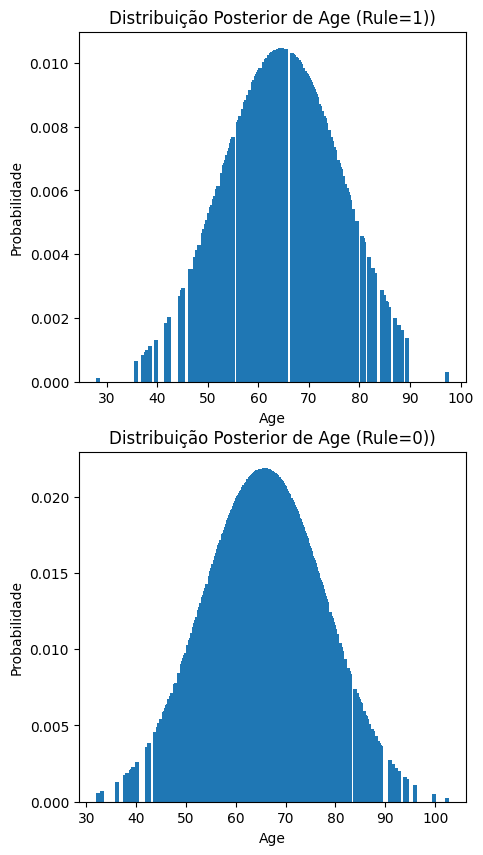

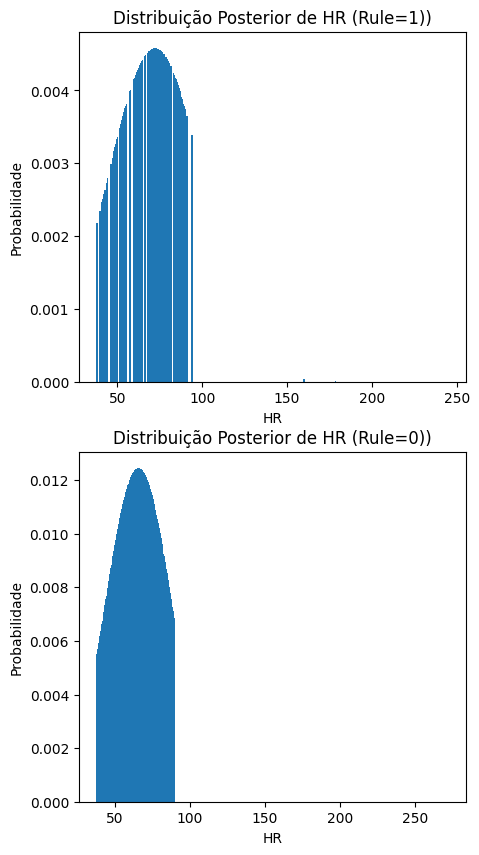

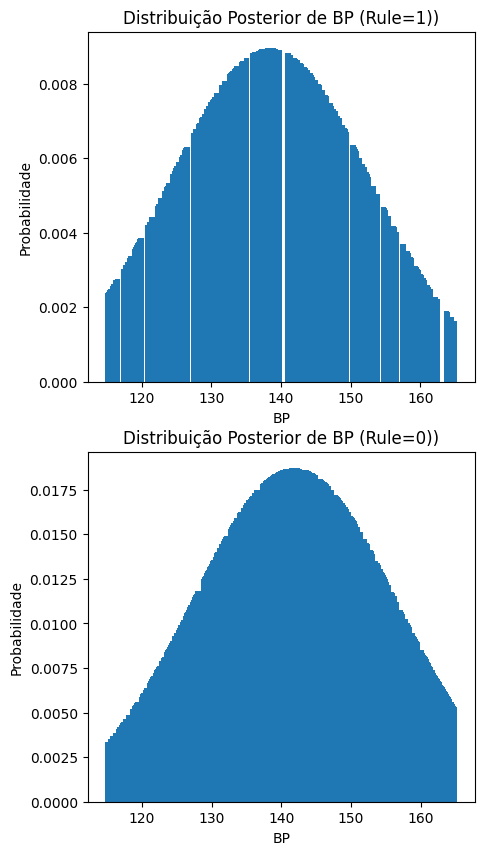

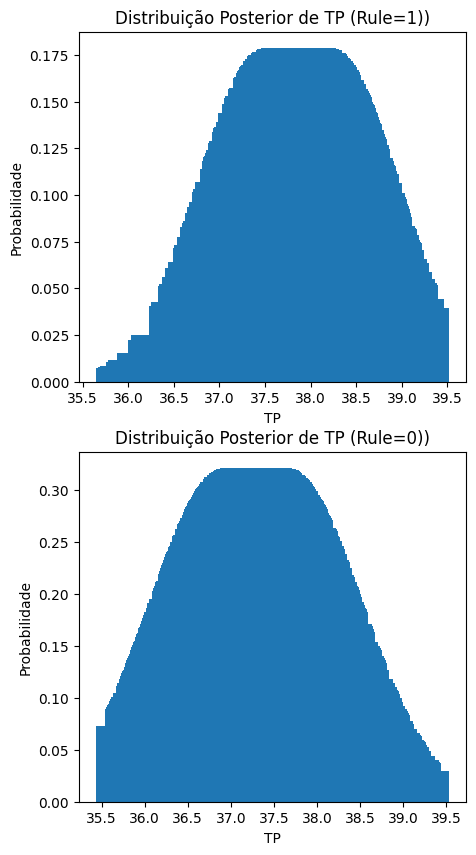

In [24]:
plot(a['AG'].unique(), not_a['AG'].unique(), Prob_1_age, Prob_0_age, 'Age', 'Probabilidade')
plot(a['HR'].unique(), not_a['HR'].unique(), Prob_1_hr, Prob_0_hr, 'HR', 'Probabilidade')
plot(a['BP'].unique(), not_a['BP'].unique(), Prob_1_bp, Prob_0_bp, 'BP', 'Probabilidade')
plot(a['TP'].unique(), not_a['TP'].unique(), Prob_1_tp, Prob_0_tp, 'TP', 'Probabilidade')

In [25]:
Prob_1_X = Prob1_continuous*Prob1_discrete*Prob_1
Prob_0_X = Prob0_continuous*Prob0_discrete*Prob_0

df['Probabilidade (Rule=1)'] = Prob_1_X
df['Probabilidade (Rule=0)'] = Prob_0_X

In [26]:
df

,GD,AG,MS,VA,BD,HR,BP,TP,Rule,GUIDELINES,Prob_Discrete (Rule=1),Prob_Discrete (Rule=0),Prob_Continuous (Rule=1),Prob_Continuous (Rule=0),Probabilidade (Rule=1),Probabilidade (Rule=0)
0,0.0,49.148903,1.0,1.0,1.0,83.456271,135.09198,37.503016,0.0,0,0.001332,0.028738,8.168387e-07,1.332171e-06,3.382256e-09,5.643886e-08
1,0.0,84.766807,1.0,0.0,3.0,79.449753,132.81408,36.832310,1.0,0,0.009575,0.012279,1.922381e-07,9.282249e-07,5.722154e-09,1.680279e-08
2,1.0,75.031336,0.0,0.0,3.0,85.470779,137.33184,37.580005,1.0,0,0.019397,0.009875,1.324848e-06,2.343980e-06,7.989180e-08,3.412431e-08
3,1.0,55.087958,0.0,0.0,1.0,51.561135,149.29652,36.959370,0.0,0,0.010655,0.013777,4.417390e-07,2.376413e-06,1.463215e-08,4.826422e-08
4,0.0,62.550938,1.0,0.0,2.0,89.008377,121.42689,37.744883,1.0,0,0.007282,0.013795,9.193097e-07,9.104418e-07,2.081217e-08,1.851556e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,1.0,68.820531,1.0,0.0,1.0,72.236092,135.37860,36.099066,0.0,0,0.013538,0.013052,1.045820e-07,1.610823e-06,4.401537e-09,3.099347e-08
596,0.0,44.434241,1.0,0.0,1.0,74.460422,144.13974,38.274403,1.0,0,0.005259,0.017130,4.617865e-07,5.518647e-07,7.550358e-09,1.393652e-08
597,0.0,79.903478,0.0,1.0,3.0,43.010392,118.61472,38.173531,0.0,1,0.001038,0.002907,2.162742e-07,2.489853e-07,6.980116e-10,1.067152e-09
598,1.0,63.209868,0.0,0.0,2.0,61.320137,135.02002,37.818543,1.0,1,0.008026,0.001483,2.052991e-06,3.690103e-06,5.122213e-08,8.069592e-09
